In [1]:
import pandas as pd
from scipy.stats import skew, kurtosis
from db.session import get_last_data_by_symbol
import matplotlib.pyplot as plt

In [ ]:
# ['xem', 'wwy' 'bonk', 'purse']

In [5]:
symbol = "H"  # Change this to the desired symbol
recordsAll = get_last_data_by_symbol(symbol=symbol)
#recordsAll = get_last_data_by_symbol(symbol="xem")

# Convert result to Pandas DataFrame
df = pd.DataFrame(recordsAll.fetchall(), columns=list(recordsAll.keys()))

# Set the timestamp column as the index
df.set_index('created_at', inplace=True)

In [6]:
# Target
lp_shift_3 = df["lastPrice"].shift(-3).rolling(window=3).mean()
lp_shift_3_6 = df["lastPrice"].shift(-6).rolling(window=3).mean()

df["future_return_pcnt_3"] = (lp_shift_3 - df["lastPrice"]) / df["lastPrice"] * 100
df["future_return_pcnt_6"] = (lp_shift_3_6 - df["lastPrice"]) / df["lastPrice"] * 100


#df["target_lp_sh_3"] = (df["future_return_pcnt_3"] >= 2).astype(int)
#df["target_lp_sh_6"] = (df["future_return_pcnt_6"] >= 5).astype(int)

# Final target combining both conditions*
df["final_target_7_after_6_period"] = (df["future_return_pcnt_6"] >= 7).astype(int)
df["final_target_5_after_3_period"] = (df["future_return_pcnt_3"] >= 5).astype(int)

skewness = df["lastPrice"].skew()
kurtosis = df["lastPrice"].kurtosis()
min_price = df["lastPrice"].min()
max_price = df["lastPrice"].max()
price_difference = max_price - min_price
percentage_difference_from_min = (price_difference / min_price) * 100
mode_price = df['lastPrice'].mode().iloc[0]

# посчитать волатильность
volatility = df["lastPrice"].std()

print(f"Symbol: {symbol}")
print(f"Skewness of lastPrice: {skewness}")
print(f"Kurtosis of lastPrice: {kurtosis}")
print(f"Minimum of lastPrice: {min_price}")
print(f"Maximum of lastPrice: {max_price}")
print(f"Mode of lastPrice: {mode_price}")
print(f"Percentage Difference from Minimum: {percentage_difference_from_min}%")
print(f"Volatility of lastPrice: {volatility}")
print(f"Count of final_target_7_after_6_period: {df['final_target_7_after_6_period'].sum()}")
print(f"Count of final_target_5_after_3_period: {df['final_target_5_after_3_period'].sum()}")
print(f"Count all: {len(df)}")

# Drop rows with NaN values
df.dropna(inplace=True)

Symbol: H
Skewness of lastPrice: -0.017249622122417506
Kurtosis of lastPrice: -0.7692428506880726
Minimum of lastPrice: 0.0025
Maximum of lastPrice: 0.10612
Mode of lastPrice: 0.020056
Percentage Difference from Minimum: 4144.8%
Volatility of lastPrice: 0.022548239567077216
Count of final_target_7_after_6_period: 113
Count of final_target_5_after_3_period: 74
Count all: 1742


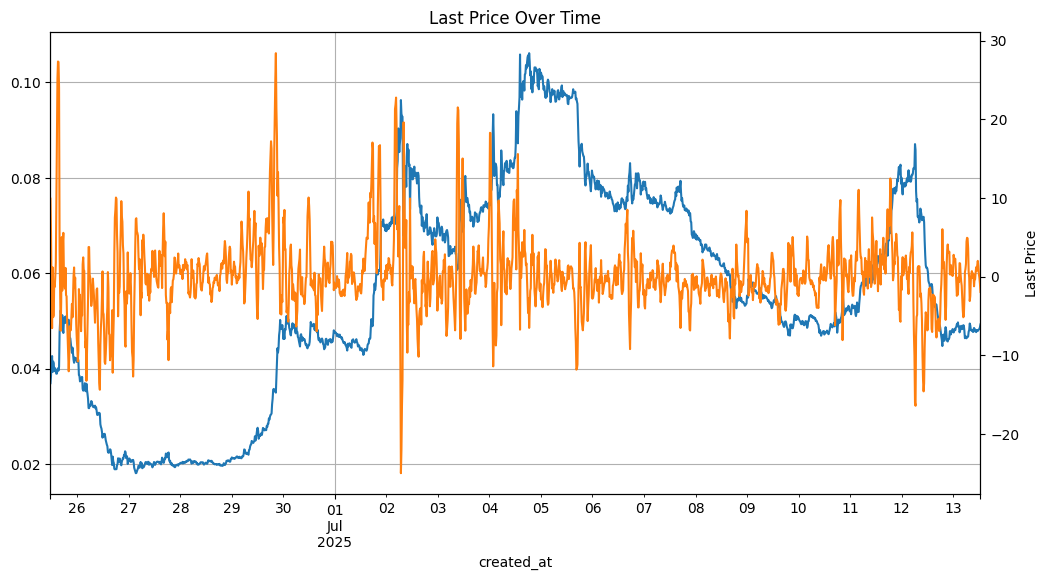

In [11]:
df['lastPrice'].plot(figsize=(12, 6), title='Last Price Over Time', grid=True, label='Last Price')
df['future_return_pcnt_6'].plot(label='Future Return % (6 periods)', secondary_y=True)

plt.xlabel('Time')
plt.ylabel('Last Price')
plt.show()